In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

C:\Users\yadag\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\yadag\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\yadag\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv(r"D:\Data\Deep_Learning\demo_data\9.random.csv", header=None)

In [3]:
data.head()

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


In [4]:
data.shape
data.info()

(400, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       400 non-null    float64
 1   1       400 non-null    float64
 2   2       400 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


In [5]:
data.duplicated().value_counts()

False    400
dtype: int64

In [6]:
data.isna().sum()

0    0
1    0
2    0
dtype: int64

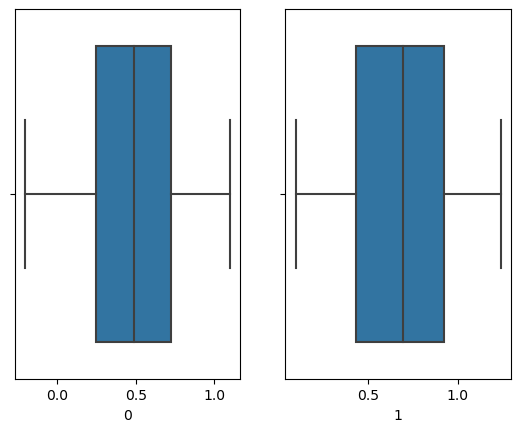

In [7]:
plt.subplot(121)
sns.boxplot(x=data[0])
plt.subplot(122)
sns.boxplot(x=data[1]);

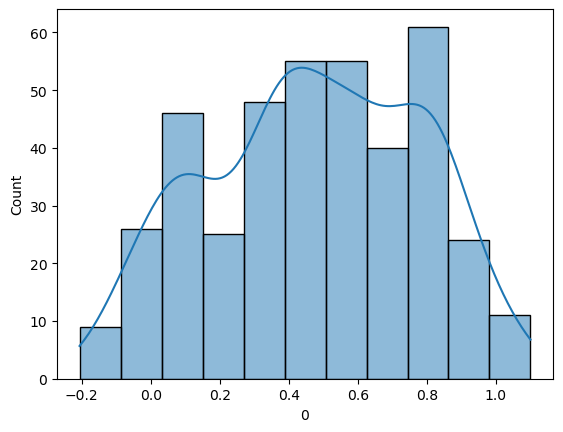

In [8]:
sns.histplot(data[0], kde=True);

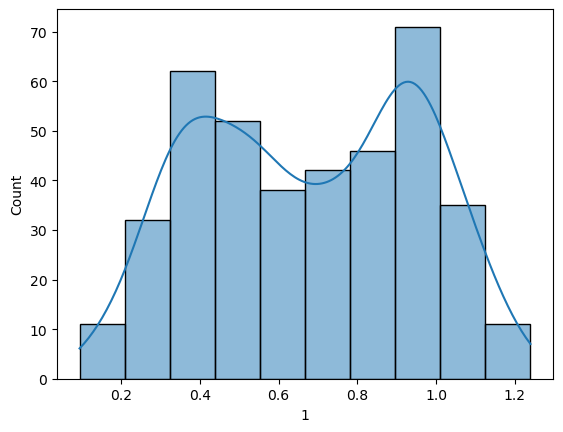

In [9]:
sns.histplot(data[1],kde=True);

In [10]:
data[2].value_counts()

1.0    202
0.0    198
Name: 2, dtype: int64

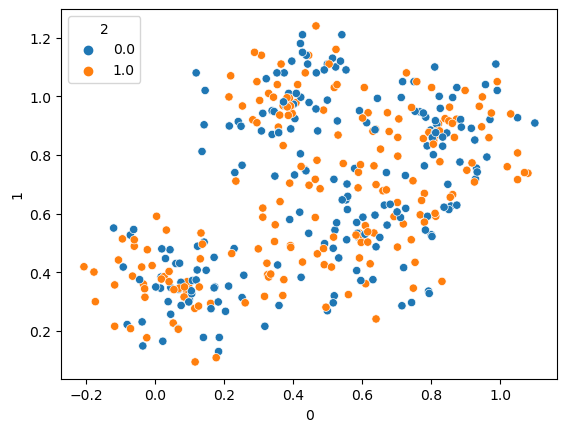

In [11]:
sns.scatterplot(x=data[0], y=data[1], hue=data[2]);

## Splitting the data

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[[0,1]],data[2],test_size=0.1)

### Rescaling the features

In [13]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_trans = std.fit_transform(x_train)
x_test_trans = std.transform(x_test)

In [14]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Buliding the model using sigmoid

In [15]:
model = Sequential()
model.add(Dense(4, activation='sigmoid', input_dim = 2))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.get_weights()

[array([[ 0.2702458 , -0.21906304, -0.34683704,  0.17248583],
        [ 0.7108338 ,  0.38634014,  0.76643586,  0.16711617]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.67397225,  0.2782799 , -0.08801609],
        [-0.34147507, -0.81473416, -0.48177695],
        [-0.16599256, -0.40186155,  0.79049706],
        [-0.02499181,  0.8318125 , -0.27206057]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.09377229,  0.3675002 ],
        [ 0.44765258, -0.5686267 ],
        [-0.29188156,  0.6646739 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.48586583],
        [1.1212164 ]], dtype=float32),
 array([0.], dtype=float32)]

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 2)                 8         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='SGD',loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(x_train_trans,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
9/9 [==============================] - 1s 25ms/step - loss: 0.7972 - accuracy: 0.4861 - val_loss: 0.7457 - val_accuracy: 0.5417
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 0.7898 - accuracy: 0.4861 - val_loss: 0.7405 - val_accuracy: 0.5417
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 0.7831 - accuracy: 0.4861 - val_loss: 0.7358 - val_accuracy: 0.5417
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 0.7767 - accuracy: 0.4861 - val_loss: 0.7314 - val_accuracy: 0.5417
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 0.7708 - accuracy: 0.4861 - val_loss: 0.7274 - val_accuracy: 0.5417
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.7652 - accuracy: 0.4861 - val_loss: 0.7237 - val_accuracy: 0.5417
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 0.7602 - accuracy: 0.4861 - val_loss: 0.7203 - val_accuracy: 0.5417
Epoch 8/200
9/9 [=========

In [20]:
y_pred = model.predict(x_test_trans)
y_pred

2/2 [==============================] - 0s 2ms/step


array([[0.48483324],
       [0.48686904],
       [0.48591098],
       [0.48601443],
       [0.48779014],
       [0.48484582],
       [0.48784006],
       [0.4880128 ],
       [0.48601928],
       [0.4867826 ],
       [0.4861873 ],
       [0.48546168],
       [0.48610792],
       [0.4880678 ],
       [0.48574167],
       [0.48784477],
       [0.48595735],
       [0.48703218],
       [0.48795697],
       [0.48635256],
       [0.48766318],
       [0.4874096 ],
       [0.4846459 ],
       [0.48460656],
       [0.48629442],
       [0.4855804 ],
       [0.4851593 ],
       [0.486573  ],
       [0.48792633],
       [0.48621544],
       [0.48694786],
       [0.486628  ],
       [0.4877684 ],
       [0.48553196],
       [0.48638994],
       [0.48779884],
       [0.4861202 ],
       [0.48549408],
       [0.48594305],
       [0.48775756]], dtype=float32)

In [21]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.425

In [23]:
val_loss = history.history['val_loss']
loss = history.history['loss']

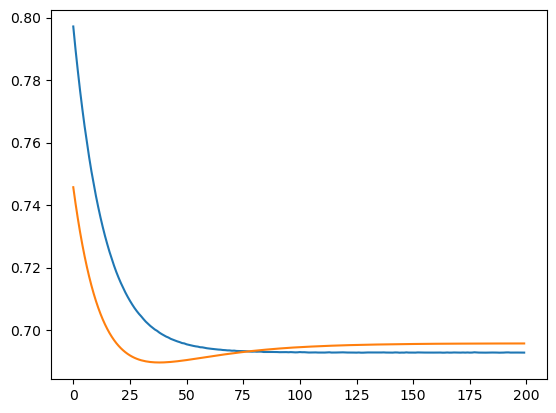

In [24]:
plt.plot(loss)
plt.plot(val_loss)

In [25]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 7s 700us/step


<AxesSubplot: >

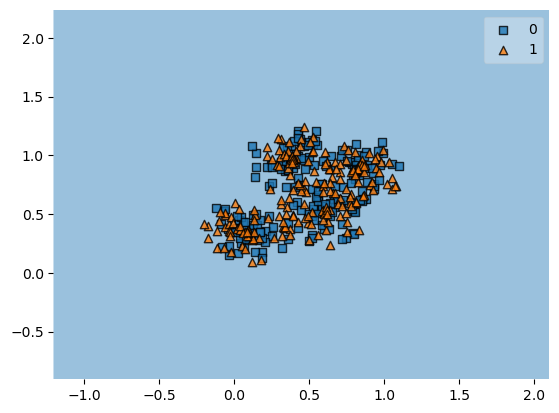

In [26]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 7s 721us/step


<AxesSubplot: >

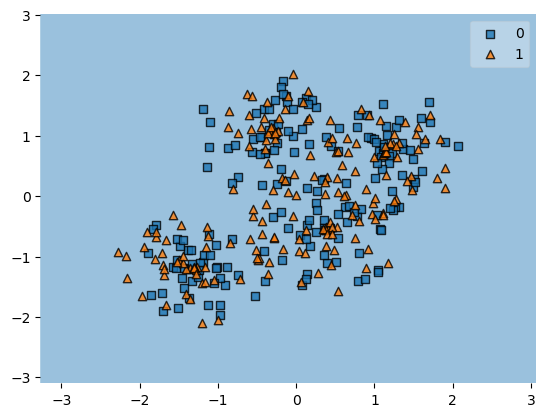

In [27]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

9600/9600 [==============================] - 7s 773us/step


<AxesSubplot: >

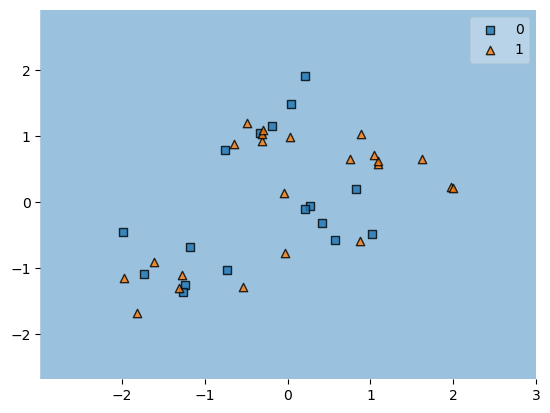

In [28]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### Buliding the model with the tanh activation func

In [29]:
model = Sequential()
model.add(Dense(3, activation='tanh', input_dim = 2))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='tanh'))

In [30]:
model.get_weights()

[array([[-0.5178249 ,  0.4992442 , -0.4102962 ],
        [-0.03461552, -0.17570406,  0.32730067]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.16074955, -0.28241867],
        [ 0.6484537 , -0.2715726 ],
        [ 0.4448018 , -0.6800234 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.567659 ],
        [1.3142942]], dtype=float32),
 array([0.], dtype=float32)]

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 2)                 8         
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
29/29 [==============================] - 1s 8ms/step - loss: 3.9417 - accuracy: 0.5139 - val_loss: 4.8878 - val_accuracy: 0.4444
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 3.5565 - accuracy: 0.5069 - val_loss: 4.6920 - val_accuracy: 0.4722
Epoch 3/50
29/29 [==============================] - 0s 2ms/step - loss: 3.3766 - accuracy: 0.5000 - val_loss: 4.5048 - val_accuracy: 0.4583
Epoch 4/50
29/29 [==============================] - 0s 2ms/step - loss: 3.1812 - accuracy: 0.5139 - val_loss: 4.1535 - val_accuracy: 0.4583
Epoch 5/50
29/29 [==============================] - 0s 2ms/step - loss: 2.8016 - accuracy: 0.5139 - val_loss: 3.5826 - val_accuracy: 0.4444
Epoch 6/50
29/29 [==============================] - 0s 3ms/step - loss: 2.3912 - accuracy: 0.5139 - val_loss: 3.2443 - val_accuracy: 0.4444
Epoch 7/50
29/29 [==============================] - 0s 2ms/step - loss: 2.3290 - accuracy: 0.5139 - val_loss: 3.0848 - val_accuracy: 0.4444
Epoch 8/50
29/29 [==

In [34]:
y_pred = model.predict(x_test_trans)
y_pred

2/2 [==============================] - 0s 2ms/step


array([[0.5289642 ],
       [0.30622557],
       [0.4773934 ],
       [0.44895813],
       [0.29339075],
       [0.5253763 ],
       [0.3015774 ],
       [0.28722015],
       [0.44693106],
       [0.33765018],
       [0.3831874 ],
       [0.5125551 ],
       [0.38856936],
       [0.2601257 ],
       [0.48053792],
       [0.20811245],
       [0.47473663],
       [0.28154382],
       [0.25847423],
       [0.44193313],
       [0.3058593 ],
       [0.34098387],
       [0.5536404 ],
       [0.5555605 ],
       [0.3551167 ],
       [0.47792897],
       [0.50370014],
       [0.40211827],
       [0.2666909 ],
       [0.37843275],
       [0.30435604],
       [0.42573538],
       [0.29593095],
       [0.4671616 ],
       [0.36535427],
       [0.29407024],
       [0.4638044 ],
       [0.4539701 ],
       [0.41847837],
       [0.30202264]], dtype=float32)

In [35]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.475

In [37]:
val_loss = history.history['val_loss']
loss = history.history['loss']

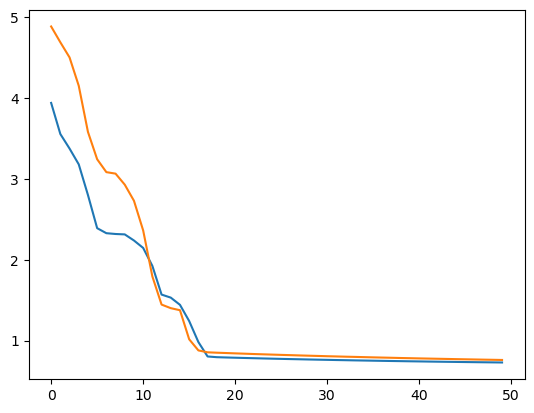

In [38]:
plt.plot(loss)
plt.plot(val_loss)

In [39]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 7s 768us/step


<AxesSubplot: >

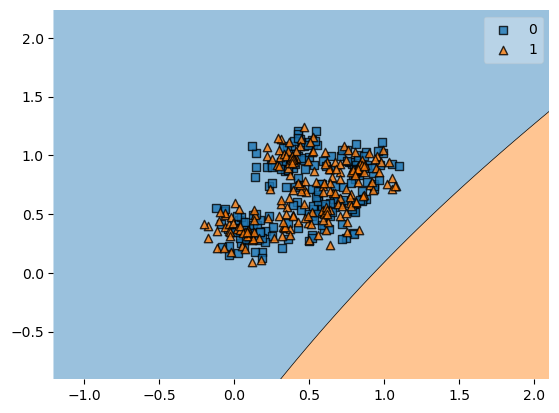

In [40]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 7s 685us/step


<AxesSubplot: >

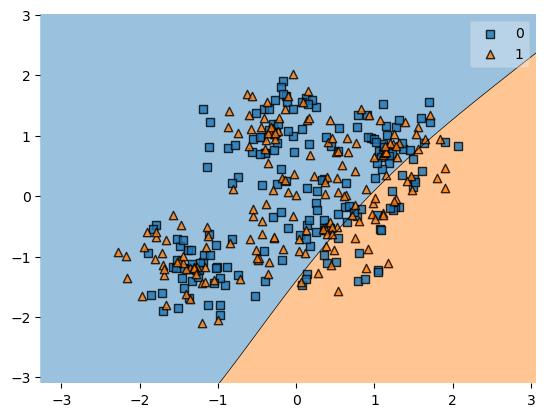

In [41]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 7s 709us/step


<AxesSubplot: >

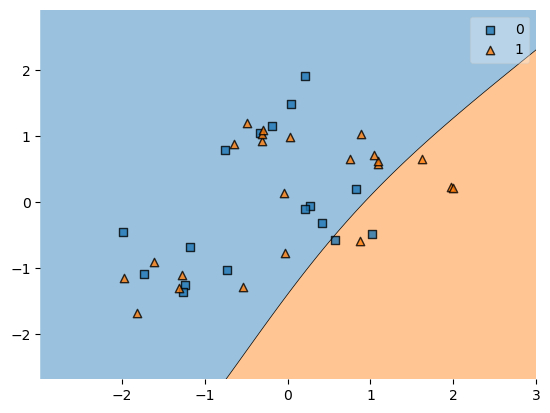

In [42]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### Buliding the model with the Relu activation func

In [43]:
model=Sequential()
model.add(Dense(5,activation="relu", input_dim=2))
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="tanh"))

In [44]:
model.get_weights()

[array([[ 6.6035593e-01,  2.7513933e-01, -5.1026976e-01, -7.6155257e-01,
         -7.1936846e-04],
        [-9.5436215e-02,  1.0303295e-01,  3.0466259e-01,  6.4549220e-01,
         -2.5666052e-01]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.20987153,  0.3155414 , -0.30458486,  0.12229586],
        [ 0.05279237, -0.23372692, -0.15638459, -0.5936471 ],
        [-0.231812  , -0.76714087,  0.5851141 ,  0.49684656],
        [ 0.09450996, -0.38985568,  0.2217654 ,  0.41829395],
        [-0.2623034 , -0.61469114,  0.71523964, -0.14629728]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.8828976 , -0.11714864],
        [ 0.30084586,  0.40410233],
        [-0.89329433, -0.9357281 ],
        [ 0.28364754,  0.48429465]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.12714183],
        [-0.37747395]], dtype=float32),
 array([0.], dtype=float32)]

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 5)                 15        
                                                                 
 dense_8 (Dense)             (None, 4)                 24        
                                                                 
 dense_9 (Dense)             (None, 2)                 10        
                                                                 
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
29/29 [==============================] - 1s 7ms/step - loss: 7.4982 - accuracy: 0.5139 - val_loss: 8.3552 - val_accuracy: 0.4583
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 7.4982 - accuracy: 0.5139 - val_loss: 8.3552 - val_accuracy: 0.4583
Epoch 3/50
29/29 [==============================] - 0s 2ms/step - loss: 7.4982 - accuracy: 0.5139 - val_loss: 8.3552 - val_accuracy: 0.4583
Epoch 4/50
29/29 [==============================] - 0s 2ms/step - loss: 7.4982 - accuracy: 0.5139 - val_loss: 8.3552 - val_accuracy: 0.4583
Epoch 5/50
29/29 [==============================] - 0s 2ms/step - loss: 7.4982 - accuracy: 0.5139 - val_loss: 8.3552 - val_accuracy: 0.4583
Epoch 6/50
29/29 [==============================] - 0s 2ms/step - loss: 7.4982 - accuracy: 0.5139 - val_loss: 8.3552 - val_accuracy: 0.4583
Epoch 7/50
29/29 [==============================] - 0s 3ms/step - loss: 7.4982 - accuracy: 0.5139 - val_loss: 8.3552 - val_accuracy: 0.4583
Epoch 8/50
29/29 [==

In [48]:
y_pred = model.predict(x_test_trans)
y_pred

2/2 [==============================] - 0s 2ms/step


array([[-0.01104629],
       [ 0.        ],
       [-0.01441769],
       [-0.00359891],
       [ 0.        ],
       [-0.00739244],
       [ 0.        ],
       [ 0.        ],
       [-0.00221028],
       [ 0.        ],
       [ 0.        ],
       [-0.0227302 ],
       [ 0.        ],
       [ 0.        ],
       [-0.01237156],
       [ 0.        ],
       [-0.01420511],
       [ 0.        ],
       [ 0.        ],
       [-0.0082728 ],
       [ 0.        ],
       [ 0.        ],
       [-0.03100844],
       [-0.03159933],
       [ 0.        ],
       [-0.00299015],
       [-0.00274085],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.00818829],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.01281592],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]], dtype=float32)

In [49]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.425

In [51]:
val_loss = history.history['val_loss']
loss = history.history['loss']

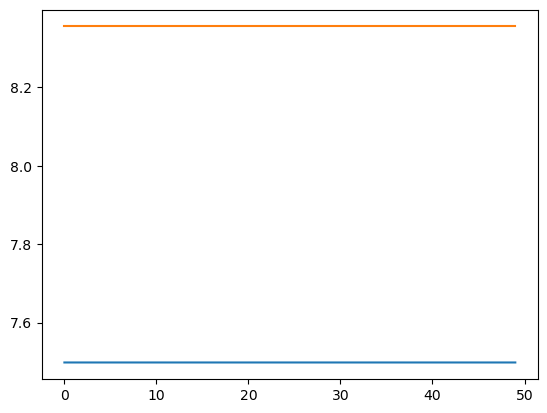

In [52]:
plt.plot(loss)
plt.plot(val_loss)

In [53]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 7s 765us/step


<AxesSubplot: >

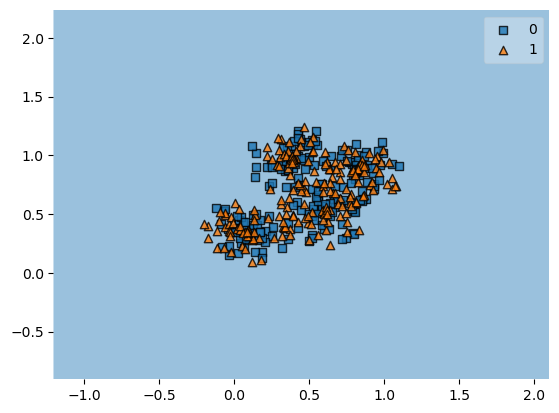

In [54]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 7s 725us/step


<AxesSubplot: >

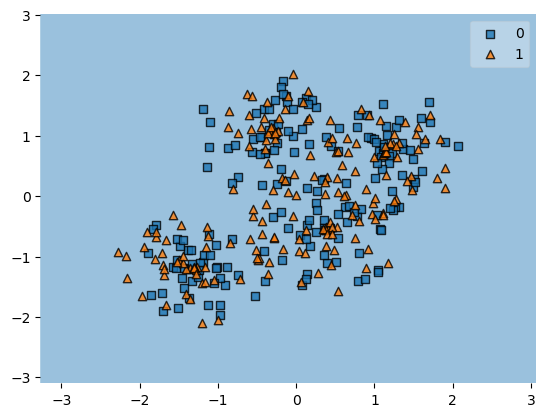

In [55]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 7s 758us/step


<AxesSubplot: >

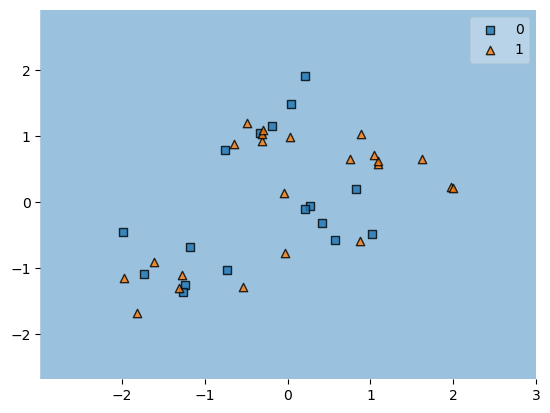

In [56]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### buliding the model with relu func

In [57]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=2))
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="relu"))

In [58]:
model.get_weights()

[array([[-0.23697597,  0.4985125 , -0.24002916,  0.81698453, -0.04252613],
        [ 0.06689572,  0.03834879,  0.10100019,  0.6777828 , -0.16310579]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.76062614,  0.08565545,  0.47963035,  0.72032964],
        [-0.02860099,  0.58922076,  0.30835116,  0.06113333],
        [-0.4176103 , -0.7348336 , -0.5747013 , -0.8075798 ],
        [ 0.4760301 , -0.7659408 ,  0.6683804 , -0.2983814 ],
        [ 0.7745793 ,  0.25077724,  0.52552307, -0.50509775]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.77721024, -0.5345285 ],
        [-0.8194828 , -0.89720273],
        [-0.9441571 , -0.5465715 ],
        [-0.72058463,  0.65618086]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.9091857],
        [ 1.3251134]], dtype=float32),
 array([0.], dtype=float32)]

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 5)                 15        
                                                                 
 dense_12 (Dense)            (None, 4)                 24        
                                                                 
 dense_13 (Dense)            (None, 2)                 10        
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
29/29 [==============================] - 1s 7ms/step - loss: 7.4982 - accuracy: 0.5139 - val_loss: 8.3552 - val_accuracy: 0.4583
Epoch 2/50
29/29 [==============================] - 0s 3ms/step - loss: 7.4982 - accuracy: 0.5139 - val_loss: 8.3552 - val_accuracy: 0.4583
Epoch 3/50
29/29 [==============================] - 0s 2ms/step - loss: 7.4982 - accuracy: 0.5139 - val_loss: 8.3552 - val_accuracy: 0.4583
Epoch 4/50
29/29 [==============================] - 0s 2ms/step - loss: 7.4982 - accuracy: 0.5139 - val_loss: 8.3552 - val_accuracy: 0.4583
Epoch 5/50
29/29 [==============================] - 0s 2ms/step - loss: 7.4982 - accuracy: 0.5139 - val_loss: 8.3552 - val_accuracy: 0.4583
Epoch 6/50
29/29 [==============================] - 0s 2ms/step - loss: 7.4982 - accuracy: 0.5139 - val_loss: 8.3552 - val_accuracy: 0.4583
Epoch 7/50
29/29 [==============================] - 0s 2ms/step - loss: 7.4982 - accuracy: 0.5139 - val_loss: 8.3552 - val_accuracy: 0.4583
Epoch 8/50
29/29 [==

In [62]:
#SGD
y_pred = model.predict(x_test_trans)
y_pred

2/2 [==============================] - 0s 4ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [63]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.425

In [65]:
val_loss = history.history['val_loss']
loss = history.history['loss']

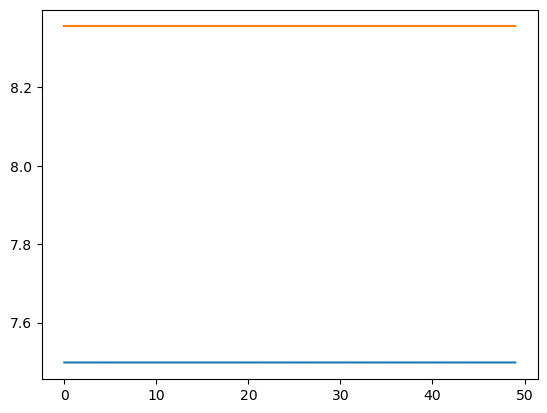

In [66]:
plt.plot(loss)
plt.plot(val_loss)

In [67]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 7s 739us/step


<AxesSubplot: >

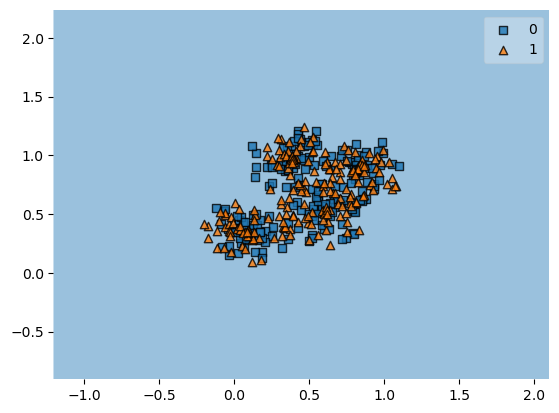

In [68]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 7s 689us/step


<AxesSubplot: >

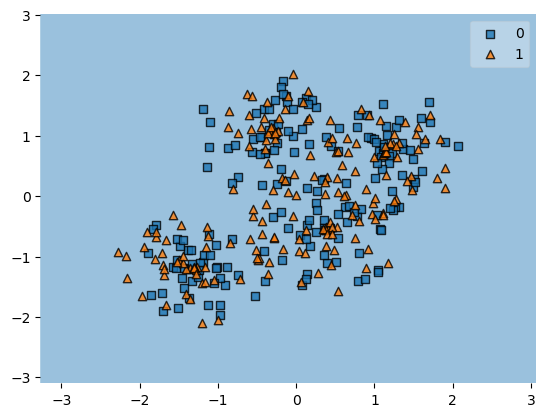

In [69]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 7s 697us/step


<AxesSubplot: >

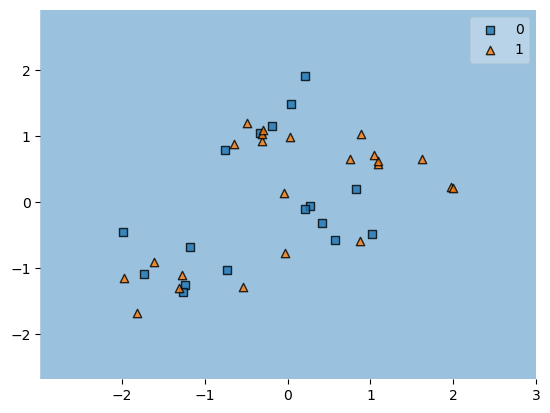

In [70]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

## relu and sigmoid

In [71]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=2))
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [72]:
model.get_weights()

[array([[ 0.0110212 , -0.33611917,  0.11906564,  0.58621836, -0.08100694],
        [-0.82131577,  0.26634097,  0.85987425, -0.2751795 , -0.6212213 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.6127396 ,  0.5520562 , -0.30222923,  0.25052345],
        [ 0.1325944 , -0.06847912,  0.4995147 , -0.07715684],
        [-0.01045096, -0.5418123 , -0.4994189 ,  0.42025852],
        [-0.17388344, -0.21197551,  0.8016125 ,  0.6094519 ],
        [ 0.1183396 , -0.76818526, -0.01224381,  0.02725857]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.83000803,  0.84026074],
        [ 0.5087147 ,  0.37106395],
        [-0.99042845,  0.5745928 ],
        [-0.11280632, -0.8794179 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.85890496],
        [0.47391295]], dtype=float32),
 array([0.], dtype=float32)]

In [73]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 15        
                                                                 
 dense_16 (Dense)            (None, 4)                 24        
                                                                 
 dense_17 (Dense)            (None, 2)                 10        
                                                                 
 dense_18 (Dense)            (None, 1)                 3         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
history = model.fit(x_train_trans,y_train,epochs=500,batch_size=10,validation_split=0.2)

Epoch 1/500
29/29 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.4688 - val_loss: 0.6932 - val_accuracy: 0.4583
Epoch 2/500
29/29 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5174 - val_loss: 0.6933 - val_accuracy: 0.4583
Epoch 3/500
29/29 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5174 - val_loss: 0.6934 - val_accuracy: 0.4583
Epoch 4/500
29/29 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5174 - val_loss: 0.6935 - val_accuracy: 0.4583
Epoch 5/500
29/29 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5174 - val_loss: 0.6936 - val_accuracy: 0.4583
Epoch 6/500
29/29 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5174 - val_loss: 0.6937 - val_accuracy: 0.4583
Epoch 7/500
29/29 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5174 - val_loss: 0.6939 - val_accuracy: 0.4583
Epoch 8/500
2

In [76]:
y_pred = model.predict(x_test_trans)
y_pred

2/2 [==============================] - 0s 1ms/step


array([[0.46780157],
       [0.46780157],
       [0.46780157],
       [0.9260261 ],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.7220237 ],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157],
       [0.46780157]], dtype=float32)

In [77]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.375

In [79]:
val_loss = history.history['val_loss']
loss = history.history['loss']

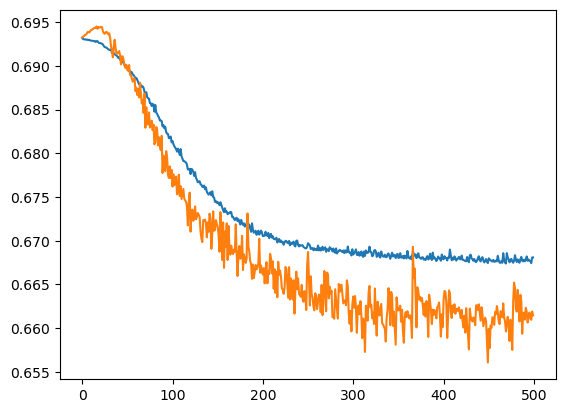

In [80]:
plt.plot(loss)
plt.plot(val_loss)

In [81]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 8s 815us/step


<AxesSubplot: >

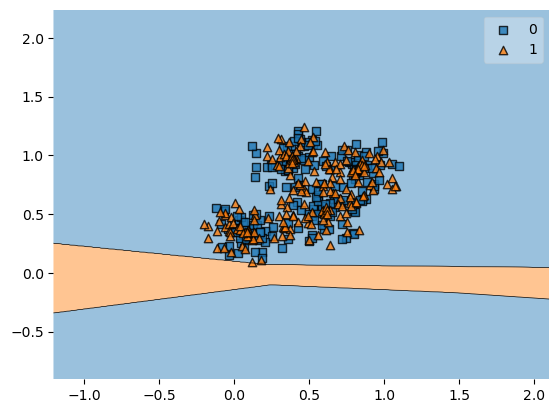

In [82]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 6s 658us/step


<AxesSubplot: >

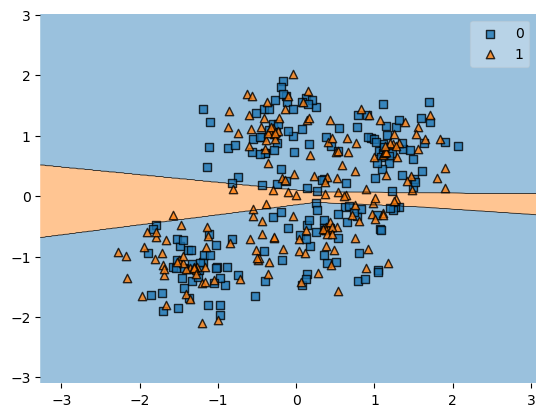

In [83]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 7s 683us/step


<AxesSubplot: >

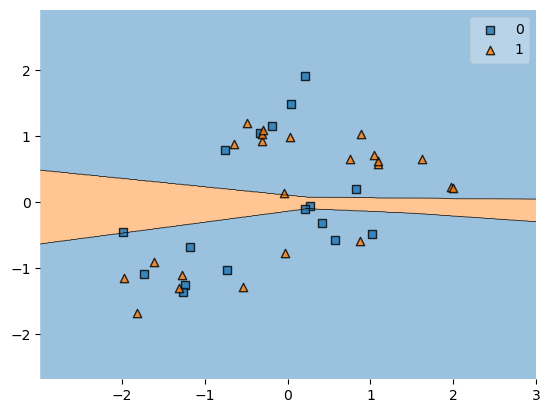

In [84]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)